## Objective

Given a patient suffering from breast cancer , we have to predict the survival status of that patient and categorise it in either of the two categories : 
###### 1 -> If the patient will survive 5 years or longer                                                                          
###### 2 -> If the patient will die within 5 years

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
haberman = pd.read_csv("haberman.csv",names = ["Age","Operation_Year","Auxillary_Node","Survival_Status"])
haberman

,Age,Operation_Year,Auxillary_Node,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [32]:
print(haberman.shape)

(306, 4)


In [33]:
print(haberman.columns)

Index(['Age', 'Operation_Year', 'Auxillary_Node', 'Survival_Status'], dtype='object')


In [34]:
haberman["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

We observe that Haberman dataset is an imbalanced dataset as the number of data points for the two class labels is not the same.

#  Bi-variate Analysis

## 2-D Scatter Plot

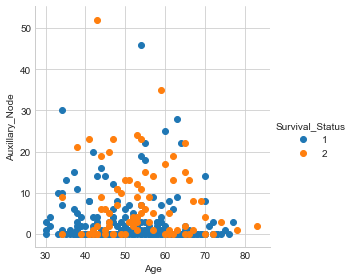

In [35]:
sns.set_style("whitegrid");
x=sns.FacetGrid(haberman, hue="Survival_Status", size=4)
x.map(plt.scatter, "Age", "Auxillary_Node") 
x.add_legend();
plt.show();


#### Observation
1. From the above 2-D scatter plot between Age vs Auxillary Node we are not able to arrive at a conclusion by looking at the figure as they are not linearly separable.
2. Thus 2-D scatter plot is not useful in predicting the survival status of the patient

## Pair - Plot

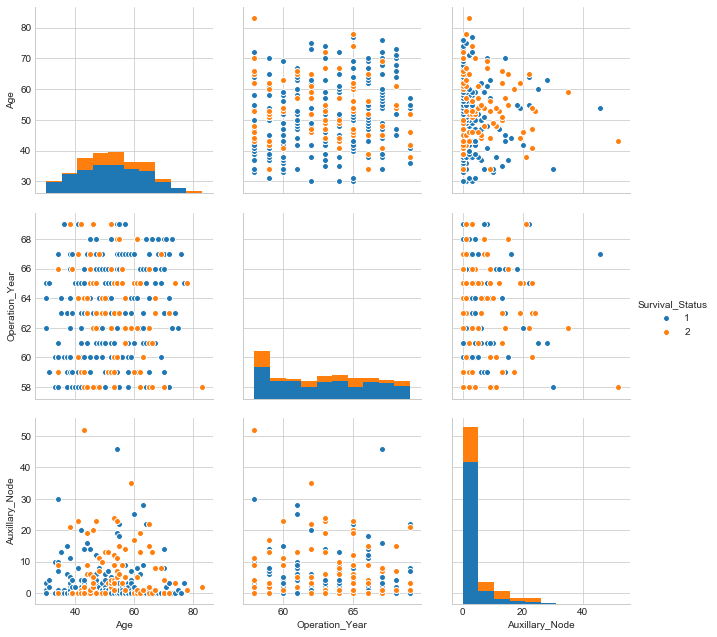

In [36]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3, vars = ['Age', 'Operation_Year', 'Auxillary_Node']);
plt.show()

#### Observation
Thus we cannot predict or classify the survival status of a patient on the basis of the above pair plots as none of them seems to be linearly separable.



# Univariate Analysis


## Histograms and PDF

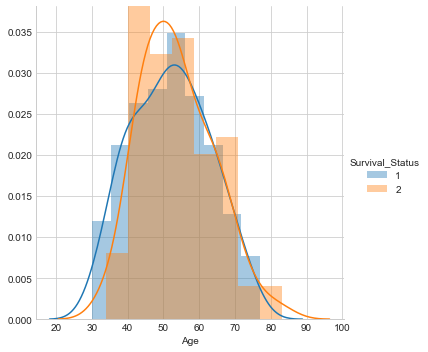

In [37]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

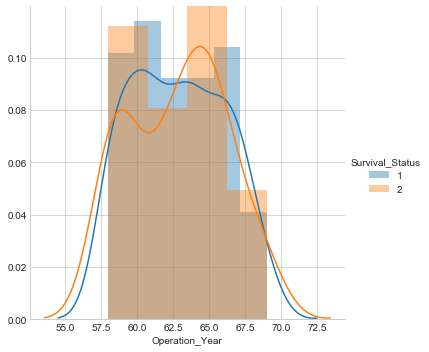

In [38]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.show();

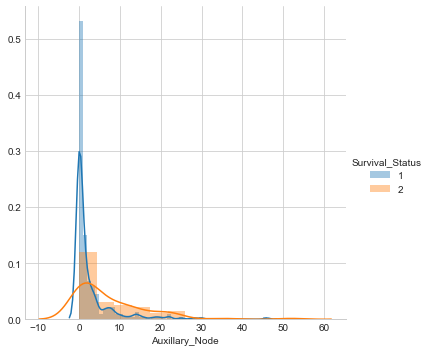

In [39]:
sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Auxillary_Node") \
   .add_legend();
plt.show();

#### Observations
1. None of the 3 variables i.e Age , Operation_Year & Auxillary_Node are useful in predicting the survival status of a patient.
2. In all 3 plots the survival status pdf curves or histograms are not well separated and mostly overlapping each other.
3. From the last plot we see that lower the number of Auxillary nodes , higher is the survival rate & as the number of Auxillary node increases the deaths also increases.



## Cumulative Distribution Function (CDF)

In [40]:
haberman_survived= haberman.loc[haberman["Survival_Status"] == 1]
haberman_not_survived = haberman.loc[haberman["Survival_Status"] == 2]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


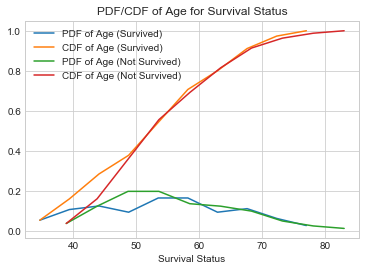

In [41]:
# Plots of CDF of Age for both categories
# Survived
counts, bin_edges = np.histogram(haberman_survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Age (Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Age (Survived)')

# Not_Survived
counts, bin_edges = np.histogram(haberman_not_survived['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Age (Not Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Age (Not Survived)')
plt.title("PDF/CDF of Age for Survival Status")
plt.xlabel("Survival Status")
plt.legend()

plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


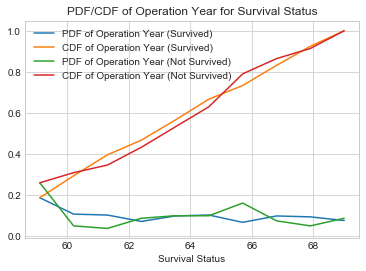

In [42]:
# Plots of CDF of Operation Year for both categories
# Survived
counts, bin_edges = np.histogram(haberman_survived['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Operation Year (Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Operation Year (Survived)')

# Not_Survived
counts, bin_edges = np.histogram(haberman_not_survived['Operation_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Operation Year (Not Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Operation Year (Not Survived)')
plt.title("PDF/CDF of Operation Year for Survival Status")
plt.xlabel("Survival Status")
plt.legend()

plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


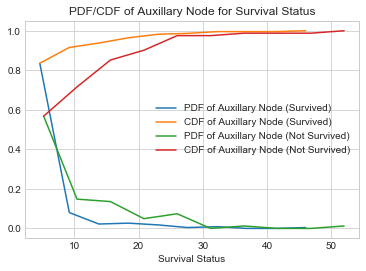

In [43]:
# Plots of CDF of Auxillary Node for both categories
# Survived
counts, bin_edges = np.histogram(haberman_survived['Auxillary_Node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Auxillary Node (Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Auxillary Node (Survived)')

# Not_Survived
counts, bin_edges = np.histogram(haberman_not_survived['Auxillary_Node'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF of Auxillary Node (Not Survived)')
plt.plot(bin_edges[1:], cdf, label = 'CDF of Auxillary Node (Not Survived)')
plt.title("PDF/CDF of Auxillary Node for Survival Status")
plt.xlabel("Survival Status")
plt.legend()

plt.show()

#### Observations
1. The above CDF plots are also not very useful for our classification purpose as there is massive overlapping.
2. From the last plot it is clear that if the number of Auxillary nodes are less then chances of survival is high whereas if the number of Auxillary nodes is high then chances of death is very high.


## Box Plot With Whiskers

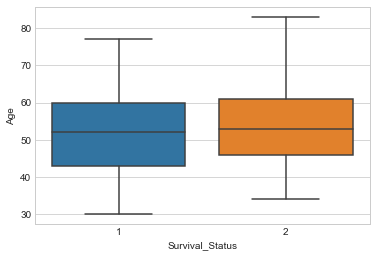

In [44]:
# Age
sns.boxplot(x='Survival_Status',y='Age', data=haberman)
plt.show()

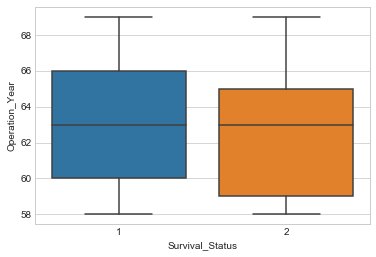

In [45]:
# Operation Year
sns.boxplot(x='Survival_Status',y='Operation_Year', data=haberman)
plt.show()

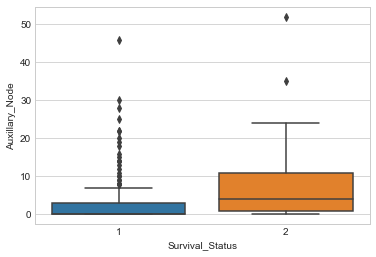

In [46]:
# Auxillary Nodes
sns.boxplot(x='Survival_Status',y='Auxillary_Node', data=haberman)
plt.show()

#### Observation
1. From the first two plots nothing is clear regarding the survival status of patients.
2. From the last plot we can say that those who did not survive had auxillary nodes approximately more than 3.


## Violin Plots

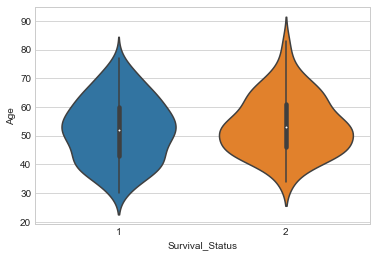

In [47]:
# Age

sns.violinplot(x='Survival_Status',y='Age', data=haberman, size = 8)
plt.show()

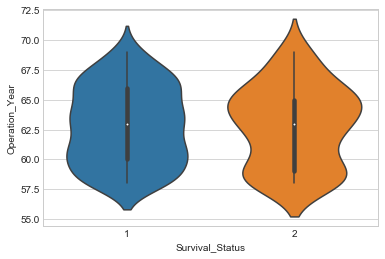

In [48]:
# Year of Operation

sns.violinplot(x='Survival_Status',y='Operation_Year', data=haberman, size = 8)
plt.show()

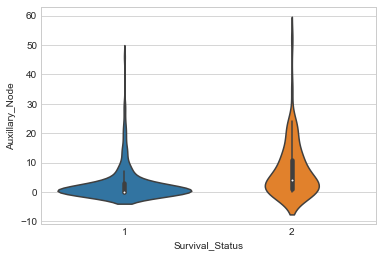

In [49]:
# Number of Auxillary Nodes

sns.violinplot(x='Survival_Status',y='Auxillary_Node', data=haberman, size = 8)
plt.show()

#### Obsevations
1. We are not able to classify the survival status of the patients.
2. Number of deaths are more as the auxillary node increases.
3. Thus number of auxillary node is affecting the survival status of a patient.
